#### 2. Build the linear regression model using scikit learn in boston data to predict 'Price' based on other dependent variable.

In [4]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
import seaborn as sns

In [5]:
boston = load_boston()
bos = pd.DataFrame(boston.data)
bosTarget = pd.DataFrame(boston.target)

In [6]:
n_samples = bos.shape[0]
n_features = bos.shape[1]
print(n_samples, n_features)

506 13


## Understand the data

#### 1. check datatypes and print some data

In [7]:
for i in list(zip(bos.columns.values, bos.dtypes.values)):
    print(i)

(0, dtype('float64'))
(1, dtype('float64'))
(2, dtype('float64'))
(3, dtype('float64'))
(4, dtype('float64'))
(5, dtype('float64'))
(6, dtype('float64'))
(7, dtype('float64'))
(8, dtype('float64'))
(9, dtype('float64'))
(10, dtype('float64'))
(11, dtype('float64'))
(12, dtype('float64'))


In [8]:
bos.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [10]:

bos[8].unique()

array([ 1.,  2.,  3.,  5.,  4.,  8.,  6.,  7., 24.])

In [11]:
bos[3].unique()

array([0., 1.])

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x0000023C7DA378D0>]],
      dtype=object)

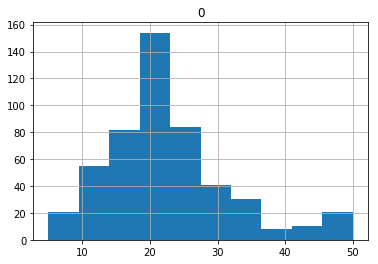

In [12]:
bosTarget.hist()

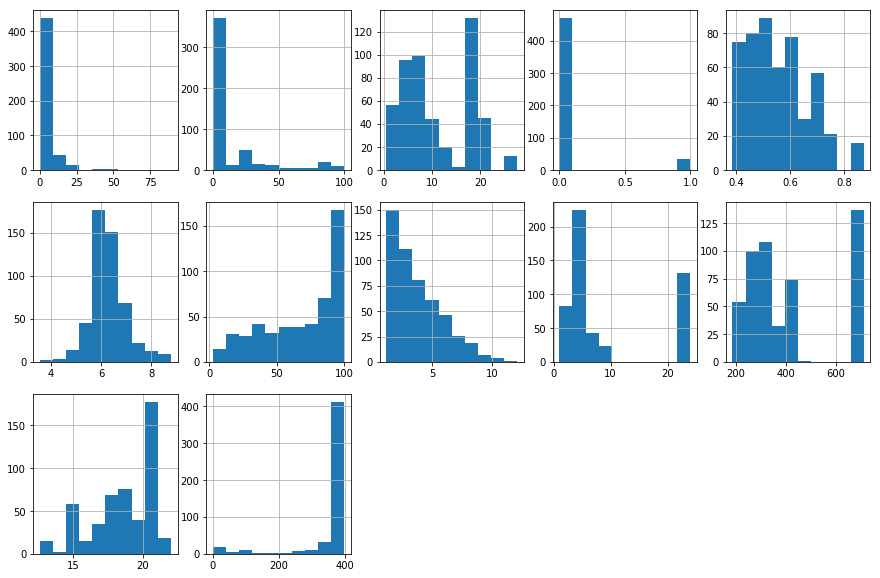

In [13]:
plt.figure(figsize=(15,10))
for i in range(0, n_features-1):
    plt.subplot(3,5, i+1)
    bos[i].hist()

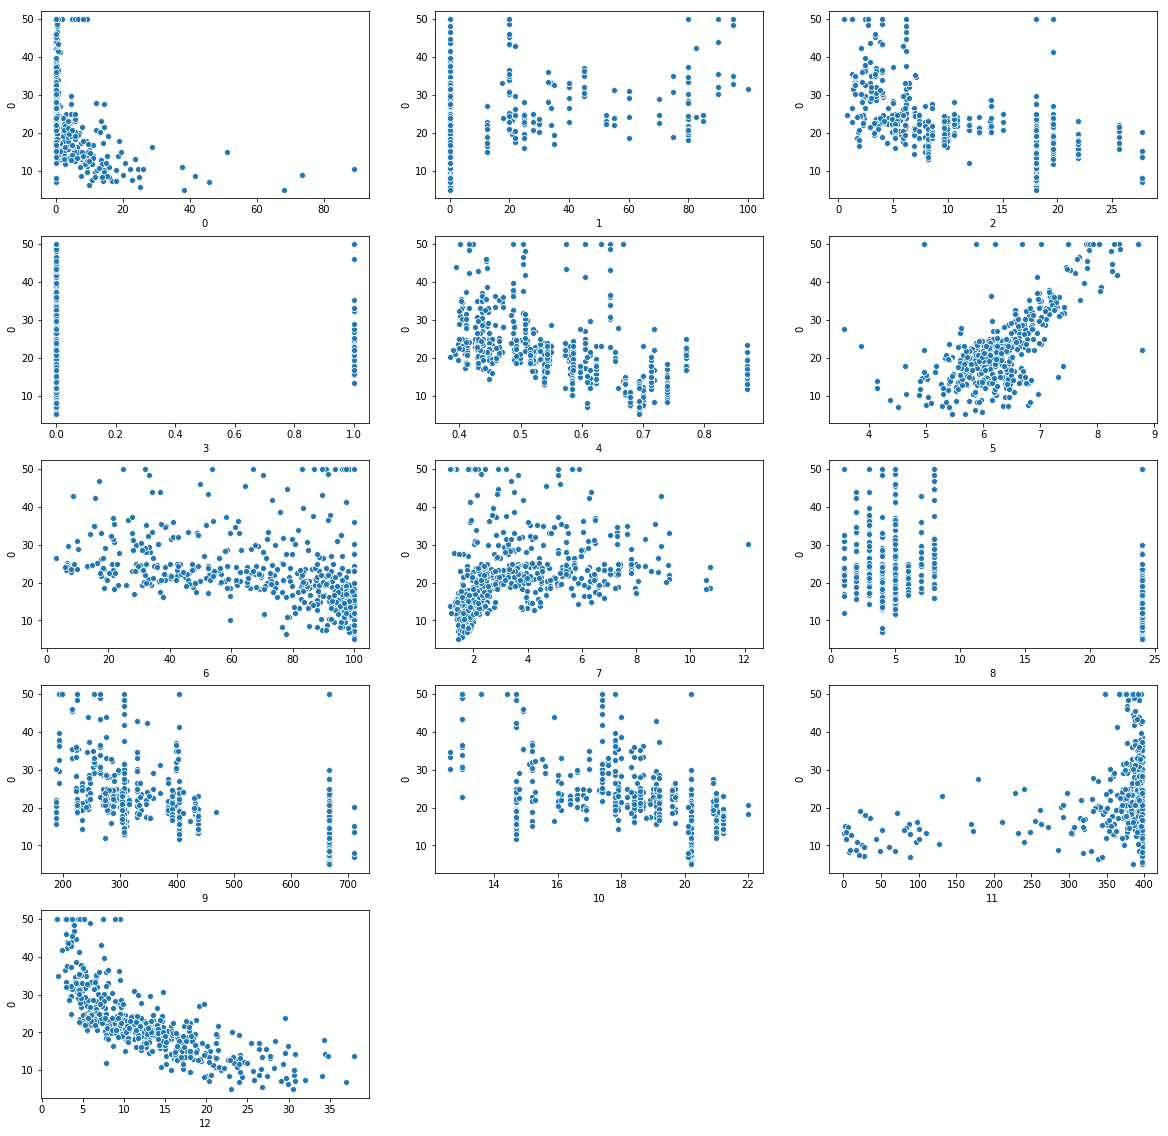

In [14]:

plt.figure(figsize=(20,20))
for i in range(0, n_features):
    plt.subplot(5,3,i+1)    
    sns.scatterplot(x=bos[i], y=bosTarget[0], legend='brief')

In [15]:
joinedData = bosTarget.join(bos,lsuffix='_target')
joinedData.columns

Index(['0_target', '0', 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12], dtype='object')

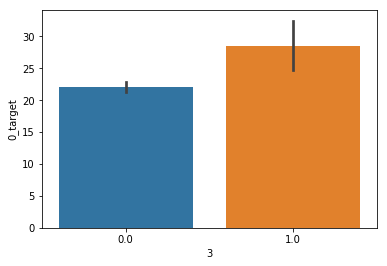

In [16]:
sns.barplot(data=joinedData, x=3, y='0_target')

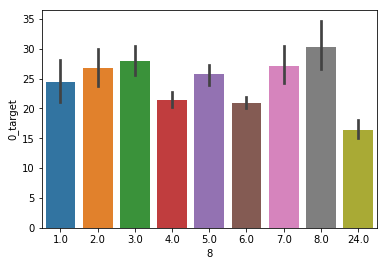

In [17]:
sns.barplot(data=joinedData, x=8, y='0_target')

##### Correlation between variables

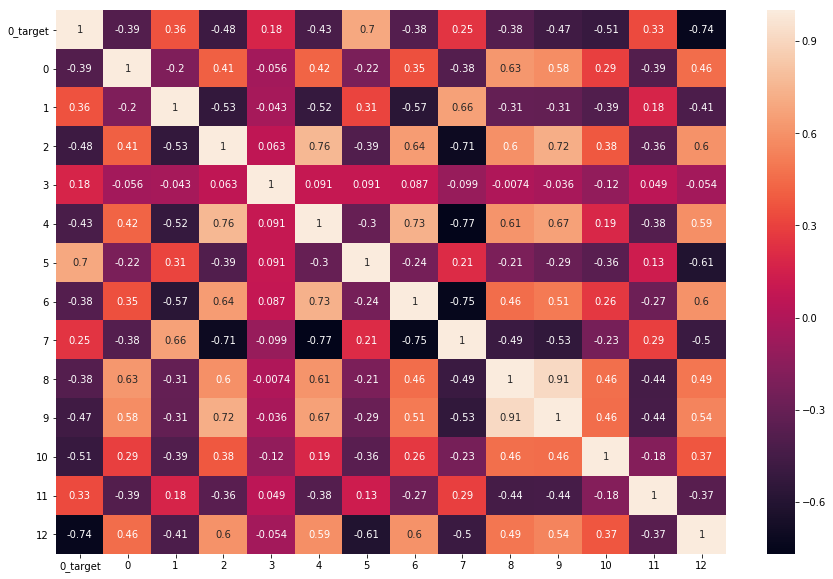

In [19]:
plt.figure(figsize=(15,10))
sns.heatmap(joinedData.corr(), annot=True)

## Build a model

##### 1. Using all independant variables

In [20]:

x_train, x_test, y_train, y_test = train_test_split(bos, bosTarget, test_size=0.3, random_state=12345)

In [24]:
model = LinearRegression()
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [25]:
model.score(x_train, y_train)

0.7510121817454651

In [27]:
y_predicted = model.predict(x_test)

In [28]:
model.score(x_test, y_test)

0.6922062861008863

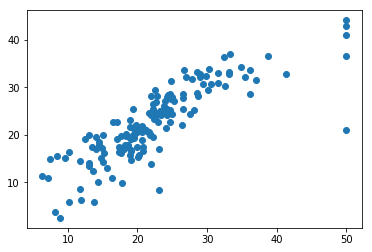

In [29]:
plt.scatter(y_test, y_predicted)

### 2. Using only significant variables

In [30]:
# convert numerical variable which seems to be categorical into ordinal
values, mapping = pd.factorize(bos[3])
bos[3] = values

In [31]:

x_train, x_test, y_train, y_test = train_test_split(bos[[3, 5, 7, 10, 12]], bosTarget, test_size=0.3, random_state=12345)

In [32]:
model.fit(x_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [33]:
model.score(x_train, y_train)

0.7132000619140129

In [34]:
model.score(x_test, y_test)

0.6316649987145865

In [35]:
y_predicted = model.predict(x_test)

In [ ]:
plt.scatter(y_test, (y_test - y_predicted))

In [36]:
model.fit(x_test[[5, 7, 10, 12]], y_test)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [37]:
model.score(x_test[[5, 7, 10, 12]], y_test)

0.6725374359374291